In [ ]:
import numpy as np
import random

# Person Object AKA Joe
class Person(object):
    def __init__(self):
        self.status = "Susceptible"
        self.days_sick = 0
        self.sickness_rate = 25
        self.Interaction = []
        self.masked = False
        # We will divide the population between workers and non workers, the non workers include unemployed and children and teenagers
        # Here we consider that in Costa Rica the 31 % of the population are children and teenagers and 69 % are adults, from this last %
        # the 48.66 % are adults can work and from those 48.66 % a 22 % is unemployed, vthis means the workers represent a 38.53 % of the total
        # population and that is how they will be assigned. Athough one last percentage should be considered and that is that from this 38.53 %
        # we need to check how many of them were able to wfh, which in this case only a 21.2 % was able to stay at home, 8.17 % worked form home,
        self.workers = False
        self.stay_home_workers = False # 59.57 % of the population stays at home and reduces the rate of interaction 4 and rate of infection -47 % 
        
        
    def maskUp(self, wears_mask):
        if (wears_mask):
            self.set_sickness_rate(self.sickness_rate*0.7)
            self.masked = True
    
    # This function updates the stay at home status
    def stay_at_home(self, stay_home):
        if (stay_home):
            self.set_sickness_rate(self.sickness_rate*0.78)
            self.stay_home_workers = True

    def set_sickness_rate(self, new_rate):
        self.sickness_rate = new_rate
    
    def infect(self, number_of_days_sick):
        self.status = "Infected"
        self.days_sick = number_of_days_sick
    
    def recover(self):
        self.status = "Recovered"
        self.days_sick = 0
    
    def update(self):
        if (self.status == "Susceptible"):
            self.roll_for_infection()
            
        elif (self.status == "Infected"):            
            self.days_sick = self.days_sick - 1
            if (self.days_sick <= 0):
                self.recover()
    
    def update_days_sick(self):
        if (self.status == "Infected"):            
            self.days_sick = self.days_sick - 1
            if (self.days_sick <= 0):
                self.recover()
            

            
    def roll_for_infection(self):
        is_sick = (random.randint(0,101) < self.sickness_rate)
        if (is_sick):
            self.infect(4)

In [ ]:
#Population Comunity

In [ ]:
#Population Object
class Population:
    def __init__(self, number=100, interaction=10, percentage_masked=0, percentage_stay_home=0):
        self.People = []
        self.number = number
        self.interaction = interaction
        self.percentage_masked = percentage_masked
        self.percentage_stay_home = percentage_stay_home
        if (number < 100):
            self.number = 100
        
        if (interaction < 10):
            self.interaction = 10
        
        ##build our population
        patient_Zero = Person()
        patient_Zero.infect(5)
        
        self.People.append(patient_Zero)
        
        # Here we create the percentage of people who wears masks and who stays at home:
        for i in range(0,number):
            p = Person()
            if (i < number*(self.percentage_masked/100.0) and self.percentage_masked > 0):
                p.maskUp(True)
            if i > number*(self.percentage_masked/100.0) and i<(number*(self.percentage_stay_home/100)+number*(self.percentage_masked/100.0)):
                p.stay_at_home(True)
                
            self.People.append(p)

               
            
    def number_of_sick(self):
        sick_Count = 0
        for j in self.People:
            if (j.status == "Infected"):
                sick_Count = sick_Count + 1
                
        return sick_Count
    
    def number_of_recovered(self):
        recovered_Count = 0
        for j in self.People:
            if (j.status == "Recovered"):
                recovered_Count = recovered_Count + 1
        
        return recovered_Count
    
    def number_of_susceptible(self):
        susceptible_Count = 0
        for j in self.People:
            if (j.status == "Susceptible"):
                susceptible_Count = susceptible_Count + 1
                
        return susceptible_Count
    
    def number_masked(self):
        masked_Count = 0
        for j in self.People:
            if (j.masked):
                masked_Count = masked_Count + 1
        
        return masked_Count
    
    def number_masked_sick(self):
        masked_SickCount = 0
        for j in self.People:
            if (j.masked and j.status == "Infected"):
                masked_SickCount = masked_SickCount + 1
        
        return masked_SickCount
    
###aqui se realiza el conto de las personas que se quedan en casa
    def number_stay_home(self):
        stay_home_Count = 0
        for j in self.People:
            if (j.stay_home_workers):
                stay_home_Count = stay_home_Count + 1
        
        return stay_home_Count
### se realiza el conteo de personas que se quedan en casa y tienen el status de infectados
    def number_stay_home_sick(self):
        stay_home_SickCount = 0
        for j in self.People:
            if (j.stay_home_workers and j.status == "Infected"):
                stay_home_SickCount = stay_home_SickCount + 1
        
        return stay_home_SickCount

    ## Here's the brains of the Population class (and our code)
    ## the update will be ran everyday (meaning, every iteration of our while loop)
    ## build interaction tables (who interacted with whom)
    ## if marked sick they must roll to see if (one per interaction)
    ## if I interacted with 10 people, each of them must roll and vice versa if they
    ## they were marked as infected
    def update(self):
        ## people who are might get sick
        might_Get_Sick = []
        
        for person in self.People:
            
            #clear out your interactions per day
            person.Interaction = []

            # 
            if person.stay_home_workers == True:
              self.interaction = 4
            
            ##These are the n number of people that you interact with
            for i in range(0, self.interaction):
                r = random.randint(0,self.number)
                person.Interaction.append(r)
                
            ##if "person" is Infected, every single person they interacted with might get sick
            if (person.status == "Infected"):
                person.update_days_sick()
                
                for m in person.Interaction:
                    if (self.People[m].status == "Susceptible"): #only susceptible people can get sick
                        might_Get_Sick.append(self.People[m])
            
            ##if "person" is susceptible and they interact w/ someone who is "infected" 
            ##person gets added to the "might get sick"
            if (person.status == "Susceptible"):
                for m in person.Interaction:
                    if (self.People[m].status == "Infected"):
                        might_Get_Sick.append(person)
            
        ##Now! We're going to roll through our "Might Get Sick" and they each roll a die
        ##this is only a list of susceptible people
        for p in might_Get_Sick:
            p.roll_for_infection()



---
#Person Comunity


In [ ]:
# Define the Community
# Population( size_of_population, number_of_interactions, percentage_wearing_masks, prcentage_stay_home)
myCommunity = Population(8000,10,10,10)
day = 0
my_plot = []
number_sick = myCommunity.number_of_sick()
while (number_sick > 0):
    number_sick = myCommunity.number_of_sick()
    number_recovered = myCommunity.number_of_recovered()
    number_masked = myCommunity.number_masked()
    number_masked_sick = myCommunity.number_masked_sick()
    number_stay_home_sick = myCommunity.number_stay_home_sick()
    number_stay_home = myCommunity.number_stay_home()

    my_plot.append([day, number_sick, number_recovered])
    
    if (myCommunity.percentage_masked > 0 and myCommunity.percentage_stay_home > 0):
        print ("day:", day, "Number of sick:", number_sick, "Hosptalized:", number_sick*(.04), "Sick Mask Wearers:", number_masked_sick, "Mask Wearers:", number_masked," Sick People Stay Home:", number_stay_home_sick, "People Stay Home:", number_stay_home)
    # if (myCommunity.percentage_stay_home > 0):
    #     print ("day:", day, "Number of sick:", number_sick, "Hosptalized:", number_sick*(.04), " Sick People Stay Home:", number_stay_home_sick, "People Stay Home:", number_stay_home)
    
    else:
        print ("day:", day, "Number of sick:", number_sick)
    
    day = day+1
    myCommunity.update()

#print ("day:", day, "Number of sick:", myCommunity.number_of_sick())
print ("Number recovered:", myCommunity.number_of_recovered())
print ("Number susceptible:", myCommunity.number_of_susceptible())

day: 0 Number of sick: 1 Hosptalized: 0.04 Sick Mask Wearers: 0 Mask Wearers: 800  Sick People Stay Home: 0 People Stay Home: 799
day: 1 Number of sick: 3 Hosptalized: 0.12 Sick Mask Wearers: 0 Mask Wearers: 800  Sick People Stay Home: 1 People Stay Home: 799
day: 2 Number of sick: 7 Hosptalized: 0.28 Sick Mask Wearers: 0 Mask Wearers: 800  Sick People Stay Home: 1 People Stay Home: 799
day: 3 Number of sick: 20 Hosptalized: 0.8 Sick Mask Wearers: 1 Mask Wearers: 800  Sick People Stay Home: 1 People Stay Home: 799
day: 4 Number of sick: 62 Hosptalized: 2.48 Sick Mask Wearers: 3 Mask Wearers: 800  Sick People Stay Home: 7 People Stay Home: 799
day: 5 Number of sick: 169 Hosptalized: 6.76 Sick Mask Wearers: 11 Mask Wearers: 800  Sick People Stay Home: 17 People Stay Home: 799
day: 6 Number of sick: 475 Hosptalized: 19.0 Sick Mask Wearers: 39 Mask Wearers: 800  Sick People Stay Home: 47 People Stay Home: 799
day: 7 Number of sick: 1235 Hosptalized: 49.4 Sick Mask Wearers: 93 Mask Wearers:

In [ ]:
Var_masked_stay = [x for x in range(101)]

my_plot = []
for i in Var_masked:
  #print('------------------------ Percentage equals ------------------------------------',i)
  # Define the Community
  # Population( size_of_population, number_of_interactions, percentage_wearing_masks, prcentage_stay_home)
  myCommunity = Population(8000,10,i,i)
  day = 0
  number_sick = myCommunity.number_of_sick()
  while (number_sick > 0):
      number_sick = myCommunity.number_of_sick()
      number_recovered = myCommunity.number_of_recovered()
      number_masked = myCommunity.number_masked()
      number_masked_sick = myCommunity.number_masked_sick()
      number_stay_home_sick = myCommunity.number_stay_home_sick()
      number_stay_home = myCommunity.number_stay_home()

      my_plot.append([day, number_sick, number_recovered,number_stay_home_sick,number_masked_sick])
      
      if (myCommunity.percentage_masked > 0 and myCommunity.percentage_stay_home > 0):
          print ("day:", day, "Number of sick:", number_sick, "Hosptalized:", number_sick*(.04), "Sick Mask Wearers:", number_masked_sick, "Mask Wearers:", number_masked," Sick People Stay Home:", number_stay_home_sick, "People Stay Home:", number_stay_home)
      # if (myCommunity.percentage_stay_home > 0):
      #     print ("day:", day, "Number of sick:", number_sick, "Hosptalized:", number_sick*(.04), " Sick People Stay Home:", number_stay_home_sick, "People Stay Home:", number_stay_home)
      
      else:
          print ("day:", day, "Number of sick:", number_sick)
      
      day = day+1
      myCommunity.update()

  #print ("day:", day, "Number of sick:", myCommunity.number_of_sick())
  print ("Number recovered:", myCommunity.number_of_recovered())
  print ("Number susceptible:", myCommunity.number_of_susceptible())
  # fig = plt.figure()
  # # fig1 = plt.figure()
  # # fig2 = plt.figure()
  # ax = plt.gca()
  # fig = df.plot(kind='line', x='day', y='number_sick', ax=ax).get_figure()
  # fig1 = df.plot(kind='line', x='day', y='number_masked_sick', ax=ax).get_figure()
  # fig2 = df.plot(kind='line', x='day', y='number_stay_home_sick', ax=ax).get_figure()
  # plt.savefig('test.png', bbox_inches='tight')
  # plt.show()



day: 0 Number of sick: 1
day: 1 Number of sick: 4
day: 2 Number of sick: 29
day: 3 Number of sick: 185
day: 4 Number of sick: 995
day: 5 Number of sick: 4197
day: 6 Number of sick: 7695
day: 7 Number of sick: 7816
day: 8 Number of sick: 7006
day: 9 Number of sick: 3800
day: 10 Number of sick: 277
day: 11 Number of sick: 0
Number recovered: 8001
Number susceptible: 0
day: 0 Number of sick: 1 Hosptalized: 0.04 Sick Mask Wearers: 0 Mask Wearers: 80  Sick People Stay Home: 0 People Stay Home: 79
day: 1 Number of sick: 3 Hosptalized: 0.12 Sick Mask Wearers: 0 Mask Wearers: 80  Sick People Stay Home: 0 People Stay Home: 79
day: 2 Number of sick: 9 Hosptalized: 0.36 Sick Mask Wearers: 0 Mask Wearers: 80  Sick People Stay Home: 0 People Stay Home: 79
day: 3 Number of sick: 26 Hosptalized: 1.04 Sick Mask Wearers: 0 Mask Wearers: 80  Sick People Stay Home: 0 People Stay Home: 79
day: 4 Number of sick: 84 Hosptalized: 3.36 Sick Mask Wearers: 0 Mask Wearers: 80  Sick People Stay Home: 0 People Sta

# 2. Make a function that allows the interventions to be easily tested

Create a function that allows the Community object interventions parameters to be tested over the range of 0 to that number (Ex. Population Size, Number of Interactions, Percentage Masked, Percentage Stay Home). 

In [ ]:
import pandas as pd
data = pd.DataFrame(my_plot, columns=['day', 'num_sick', 'number_recovered', 'number_stay_home_sick','number_masked_sick'])

In [ ]:
data.tail()

,day,num_sick,number_recovered,number_stay_home_sick,number_masked_sick
2161,9,5949,2052,0,5949
2162,10,2392,5609,0,2392
2163,11,213,7788,0,213
2164,12,5,7996,0,5
2165,13,0,8001,0,0


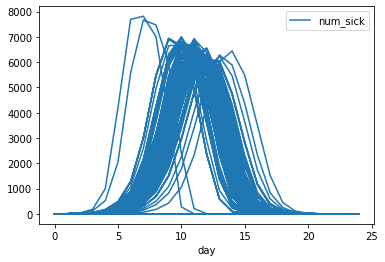

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.gca()
fig = data.plot(kind='line', x='day', y='num_sick', ax=ax).get_figure()
plt.savefig('test.png', bbox_inches='tight')
plt.show()

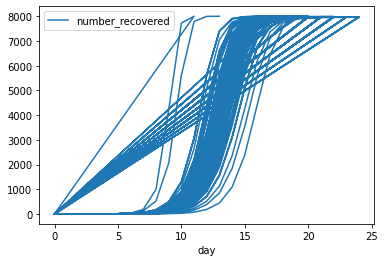

In [ ]:
fig = plt.figure()
ax = plt.gca()
fig = data.plot(kind='line', x='day', y='number_recovered', ax=ax).get_figure()
plt.savefig('test.png', bbox_inches='tight')
plt.show()

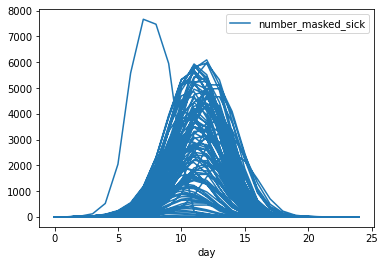

In [ ]:
fig = plt.figure()
ax = plt.gca()
fig = data.plot(kind='line', x='day', y='number_masked_sick', ax=ax).get_figure()
plt.savefig('test.png', bbox_inches='tight')
plt.show()

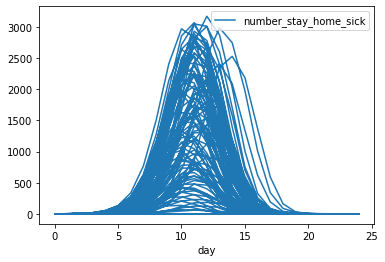

In [ ]:
fig = plt.figure()
ax = plt.gca()
fig = data.plot(kind='line', x='day', y='number_stay_home_sick', ax=ax).get_figure()
plt.savefig('test.png', bbox_inches='tight')
plt.show()

In [ ]:
data.to_csv('Data.csv')

In [ ]:
def myCommunityTests(pop_test, interactions_test, masked_test):
    # Population( size_of_population, number_of_interactions, percentage_wearing_masks)
    myCommunity = Population(pop_test,interactions_test,masked_test)
    day = 0
    my_plot = []
    number_sick = myCommunity.number_of_sick()
    while (number_sick > 0):
        number_sick = myCommunity.number_of_sick()
        number_recovered = myCommunity.number_of_recovered()
        number_masked = myCommunity.number_masked()
        number_masked_sick = myCommunity.number_masked_sick()
    
        my_plot.append([day, number_sick, number_recovered])
    
        if (myCommunity.percentage_masked > 0):
            print ("day:", day, "Number of sick:", number_sick, "Hosptalized:", number_sick*(.04), "Sick Mask Wearers:", number_masked_sick, "Mask Wearers:", number_masked)
        else:
            print ("day:", day, "Number of sick:", number_sick)
    
        day = day+1
        myCommunity.update()

    #print ("day:", day, "Number of sick:", myCommunity.number_of_sick())
    print ("Number recovered:", myCommunity.number_of_recovered())
    print ("Number susceptible:", myCommunity.number_of_susceptible())